## 개념

## 정규방정식

**(1) scikit-learn의 LinearRegression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('../../dataset/insurance.csv')
data

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ukcok191 because the default path (/config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


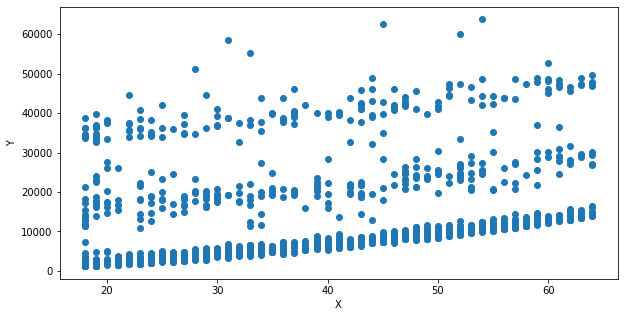

In [2]:
x = data['age']
y = data['charges']

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
x.shape, y.shape

((1338,), (1338,))

In [4]:
x = np.array(data['age'])
y = np.array(data['charges'])

x = x.reshape(1338, 1)
y = y.reshape(1338, 1)

lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [5]:
print('선형 회귀 모델 결과')
print(f'절편: {lr.intercept_}, 계수: {lr.coef_}')

선형 회귀 모델 결과
절편: [3165.88500606], 계수: [[257.72261867]]


In [6]:
print(lr.score(x, y))

0.08940589967885804


In [7]:
x_new = [[19],[64]]
y_hat = lr.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


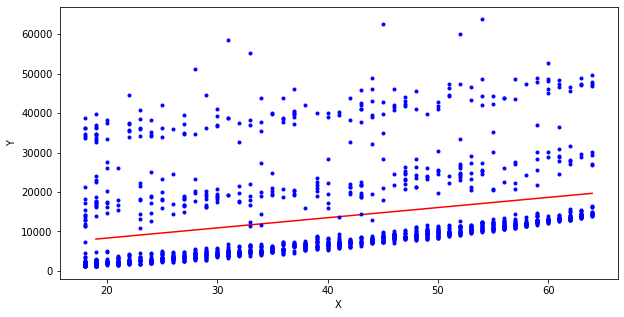

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 경사하강법

**(1) Gradient Descent는 함수 값이 낮아지는 방향으로 독립변수 값을 바꿔가면서 독립변수를 찾음 (학습의 크기: Learning Rate)**

학습율이 너무 작으면 시간이 오래걸림, 학습율리 너무 높으면 함수값이 발산되는 경향이 있다.

**(2) 경사하강법의 종류**

In [9]:
from sklearn.linear_model import SGDRegressor

data = pd.read_csv('../../dataset/insurance.csv')

x = np.array(data['age'])
y = np.array(data['charges'])

x.shape, y.shape

((1338,), (1338,))

In [10]:
x = np.array(x)
y = np.array(y)

x = x.reshape(1338, 1)
y = y.reshape(1338, 1)

sgd_reg = SGDRegressor(max_iter=1000, random_state=34)
sgd_reg.fit(x, y.ravel())

SGDRegressor(random_state=34)

In [11]:
print("SGD 회귀 모델 결과")
print(f"절편: {sgd_reg.intercept_}, 계수: {sgd_reg.coef_}")

SGD 회귀 모델 결과
절편: [6159.32587214], 계수: [89.07765947]


In [12]:
x_new = [[19], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[ 7851.801402   11860.29607798]


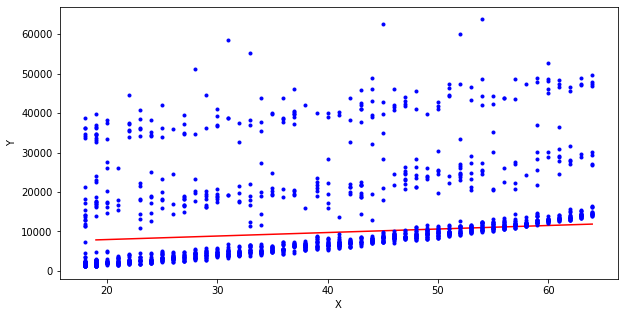

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()